# Machine learning

In [1]:
!pip install pandas numpy scikit-learn matplotlib

## Linear regression

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
boston_df = pd.read_csv('../data/boston-housing.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
boston_df = boston_df[boston_df.MEDV < 50]
len(boston_df)

490

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

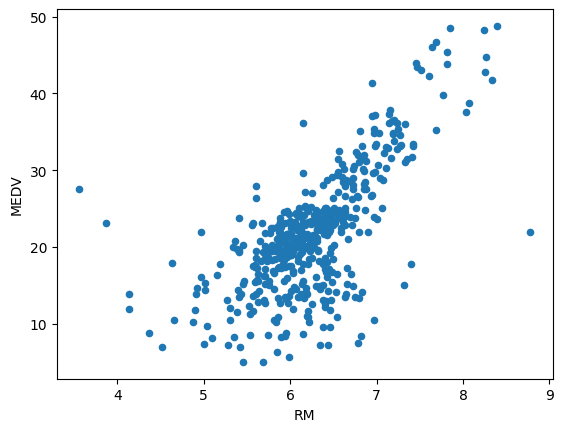

In [8]:
boston_df.plot.scatter(x='RM', y='MEDV')

In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
X = boston_df[['RM']]
y = boston_df.MEDV

X.shape, y.shape

((490, 1), (490,))

In [15]:
regression = LinearRegression()

In [18]:
regression.fit(X, y)

LinearRegression()

In [20]:
regression.coef_, regression.intercept_

(array([8.26855732]), -30.005120145375848)

In [29]:
P = pd.DataFrame({'RM': [6.575]})
P

,RM
0,6.575


In [27]:
regression.predict(P)

array([24.36064425])

In [31]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='red')

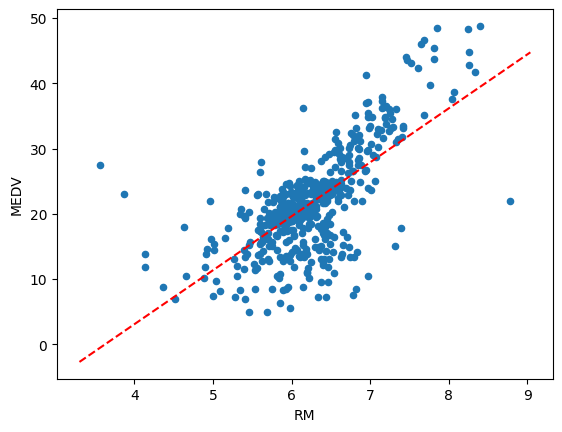

In [35]:
ax = boston_df.plot.scatter(x='RM', y='MEDV')

abline(regression.coef_, regression.intercept_)

## K-means clustering

In [36]:
iris_df = pd.read_csv('../data/iris.csv')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
colors = {"Iris-virginica": "red", "Iris-setosa": "blue", "Iris-versicolor": "green"}

In [40]:
iris_df['species_color'] = iris_df.species.apply(lambda x: colors[x])

In [41]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,species_color
0,5.1,3.5,1.4,0.2,Iris-setosa,blue
1,4.9,3.0,1.4,0.2,Iris-setosa,blue
2,4.7,3.2,1.3,0.2,Iris-setosa,blue
3,4.6,3.1,1.5,0.2,Iris-setosa,blue
4,5.0,3.6,1.4,0.2,Iris-setosa,blue
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,red
146,6.3,2.5,5.0,1.9,Iris-virginica,red
147,6.5,3.0,5.2,2.0,Iris-virginica,red
148,6.2,3.4,5.4,2.3,Iris-virginica,red


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

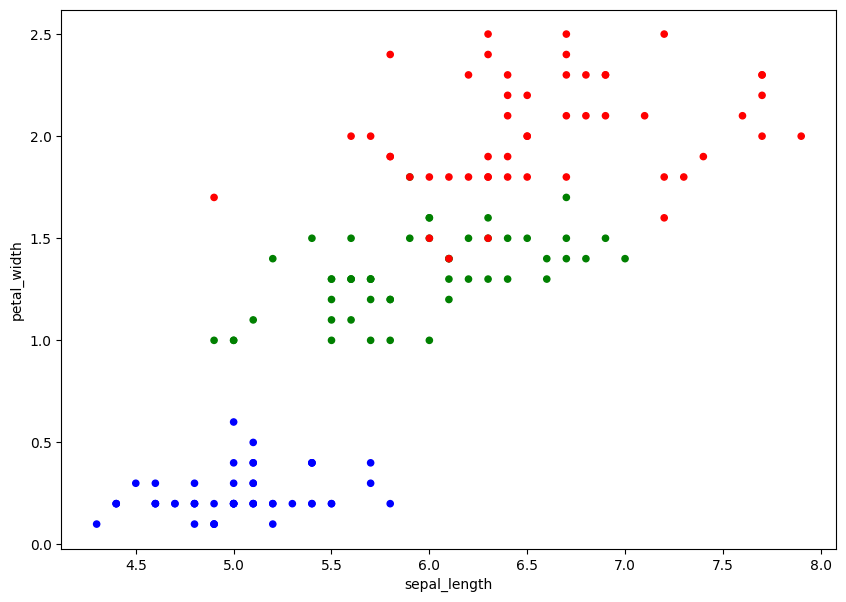

In [46]:
iris_df.plot.scatter(x='sepal_length', y='petal_width', c='species_color', figsize=(10, 7))

In [47]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=3)

In [52]:
X = iris_df[['sepal_length', 'petal_width']]

In [53]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [57]:
p = kmeans.predict(X)

In [67]:
prediction_colors = ["#9e6ebd", "#7aa457", "#cb6751"]

In [68]:
c = [prediction_colors[x] for x in p]

print(p[:10])
print(c[:10])

[0 0 0 0 0 0 0 0 0 0]
['#9e6ebd', '#9e6ebd', '#9e6ebd', '#9e6ebd', '#9e6ebd', '#9e6ebd', '#9e6ebd', '#9e6ebd', '#9e6ebd', '#9e6ebd']


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

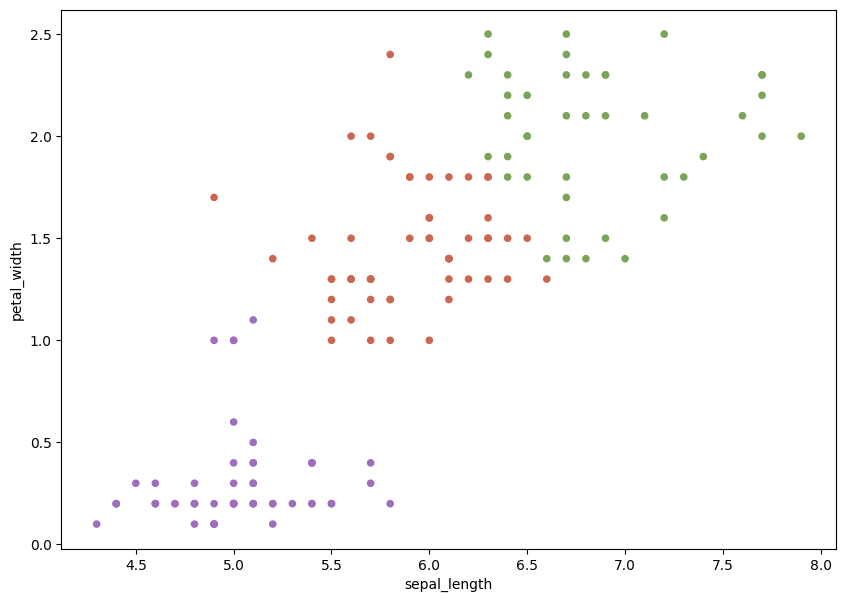

In [69]:
iris_df.plot.scatter(x='sepal_length', y='petal_width', c=c, figsize=(10, 7))